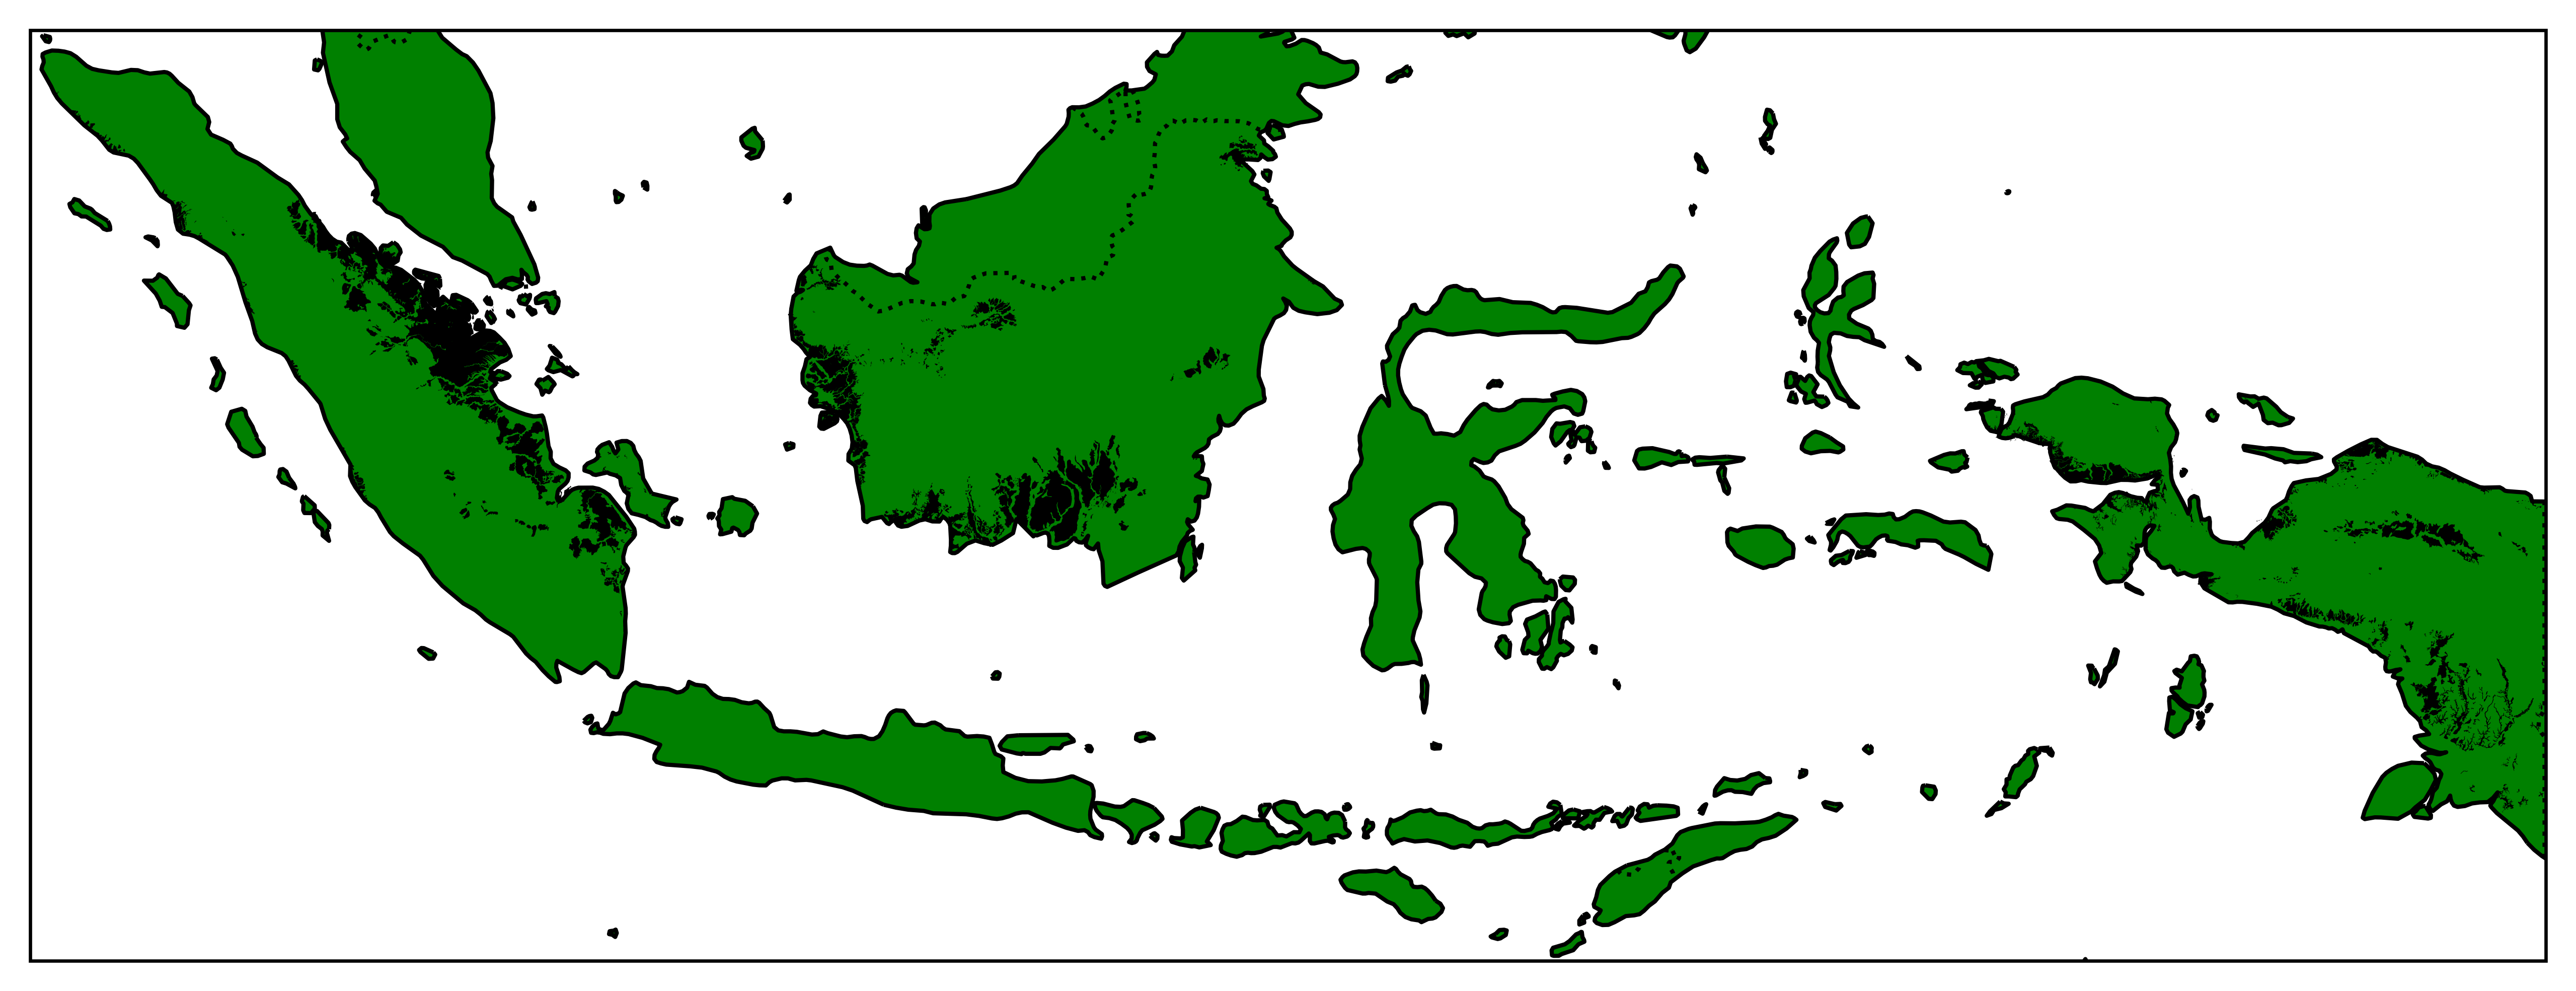

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# 读取泥炭地 shapefile 文件
shapefile_path = 'Indonesia_Peat_Lands.shp'
peat_lands = gpd.read_file(shapefile_path)

# 如果没有定义 CRS，手动设置 (假设为 WGS84)
if peat_lands.crs is None:
    peat_lands.set_crs("EPSG:4326", inplace=True)

# 创建绘图对象，并设置为地理投影
fig, ax = plt.subplots(figsize=(21, 4),dpi=600, subplot_kw={'projection': ccrs.PlateCarree()})

# 设置海洋和陆地颜色
ax.add_feature(cfeature.LAND, facecolor='green')
ax.add_feature(cfeature.OCEAN, facecolor='white')
# 添加国家边界
ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='black')
ax.add_feature(cfeature.COASTLINE, edgecolor='black')

# 放大到印尼区域
ax.set_extent([95, 141, -11, 6], crs=ccrs.PlateCarree())

# 绘制泥炭地
peat_lands.plot(ax=ax, color='black', edgecolor='none', transform=ccrs.PlateCarree())

# 显示地图
plt.show()

In [32]:
import xarray as xr

# 加载土壤湿度NetCDF文件
smap_data = xr.open_dataset('SMAP_monthly_mean_soil_moisture_indonesia.nc')['soil_moisture_monthly_mean_indonesia']

# 计算每年的土壤湿度平均值
years = range(2015, 2024)

print("Yearly Average Soil Moisture:")
for year in years:
    # 选择特定年份的数据
    soil_moisture_year = smap_data.sel(time=str(year))
    
    # 计算全区域的平均值
    mean_value = soil_moisture_year.mean(['lon', 'lat'])
    
    # 检查 mean_value 的维度
    print(f"Mean value for {year} (before extraction): {mean_value.values}")
    
    # 如果 mean_value 仍然是数组，取第一个元素
    mean_value_scalar = mean_value.values.item() if mean_value.size == 1 else mean_value.values[0]
    
    # 打印结果
    print(f"{year}: {mean_value_scalar:.3f}")


Yearly Average Soil Moisture:
Mean value for 2015 (before extraction): [0.385146   0.32320119 0.30125692 0.26298664 0.24988416 0.3159857
 0.36353657]
2015: 0.385
Mean value for 2016 (before extraction): [0.36711672 0.39744181 0.40239873 0.40923806 0.41404437 0.41023738
 0.39737287 0.37598699 0.38517308 0.40389953 0.41702124 0.42106463]
2016: 0.367
Mean value for 2017 (before extraction): [0.41958968 0.41264536 0.42323278 0.42532957 0.41934894 0.40679482
 0.39737176 0.37364654 0.36518038 0.37666908 0.39967489 0.41312829]
2017: 0.420
Mean value for 2018 (before extraction): [0.41484226 0.39720801 0.41615819 0.40969693 0.40102007 0.38251905
 0.36527714 0.32849435 0.32431618 0.32427692 0.36149773 0.3937797 ]
2018: 0.415
Mean value for 2019 (before extraction): [0.39749228 0.39883371 0.38697329 0.39341154 0.38290186 0.38105786
 0.34054824 0.30038135 0.26758279 0.29725342 0.30618644 0.33770075]
2019: 0.397
Mean value for 2020 (before extraction): [0.36153115 0.37295742 0.38871875 0.40621733 

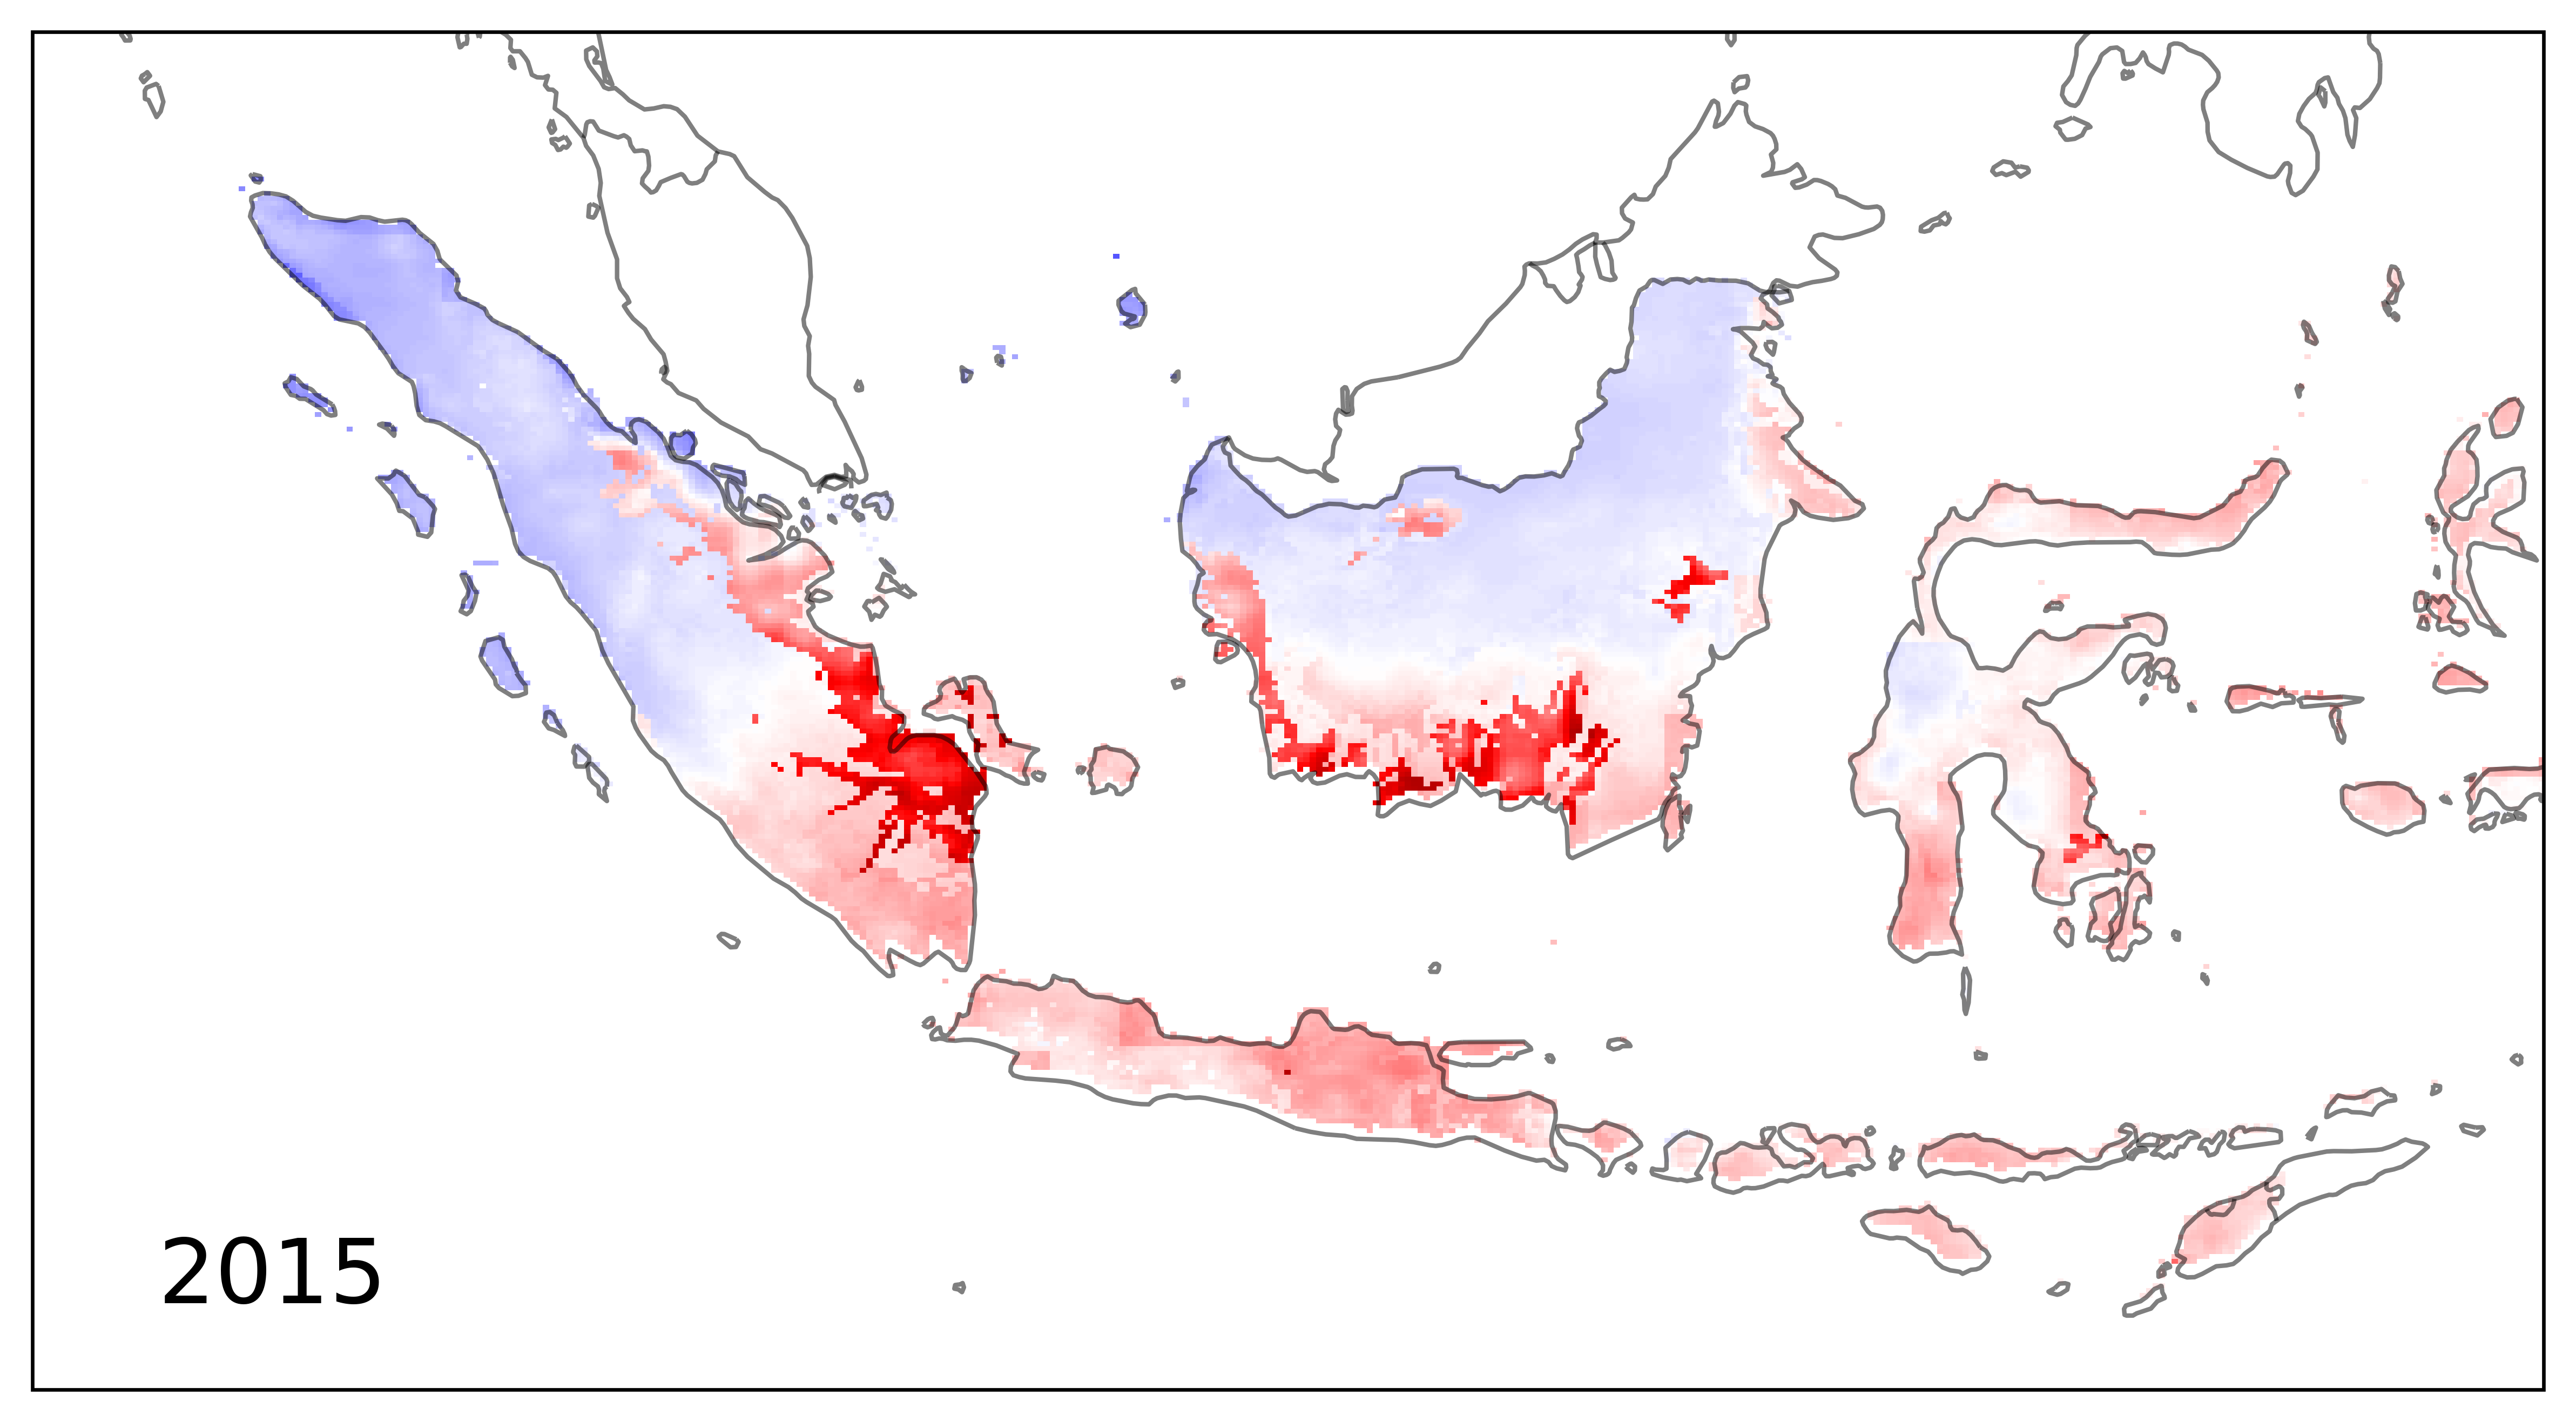

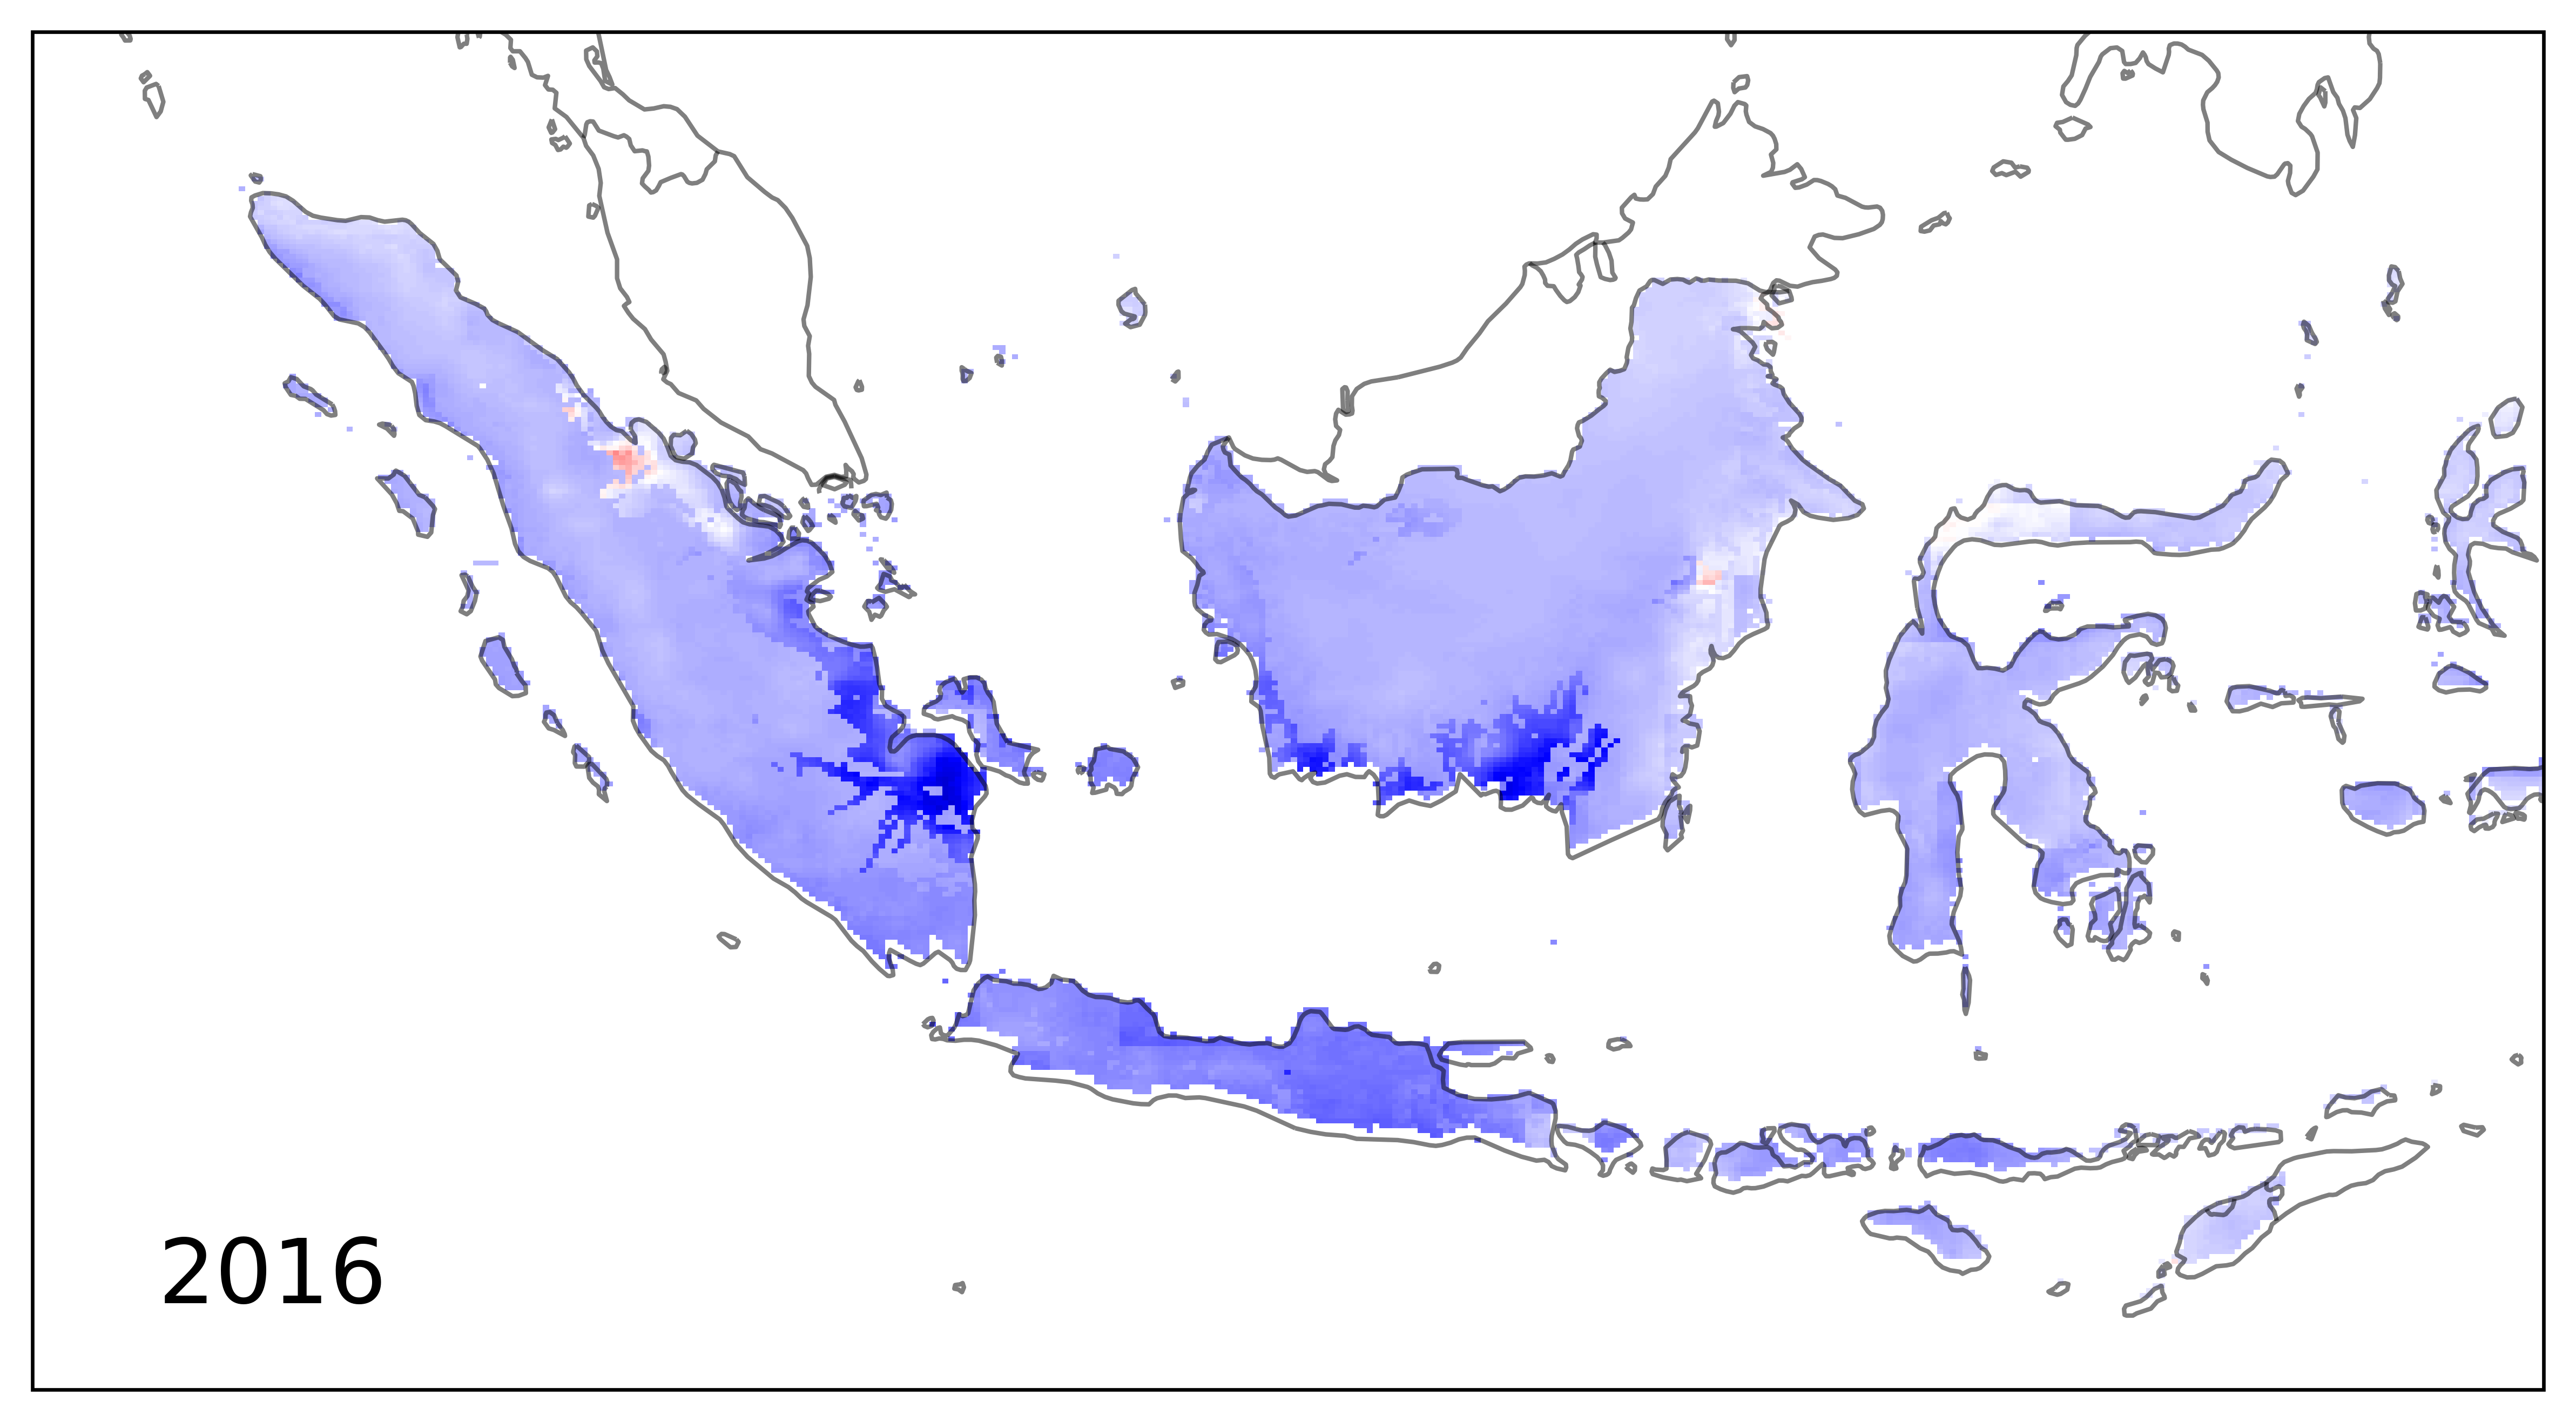

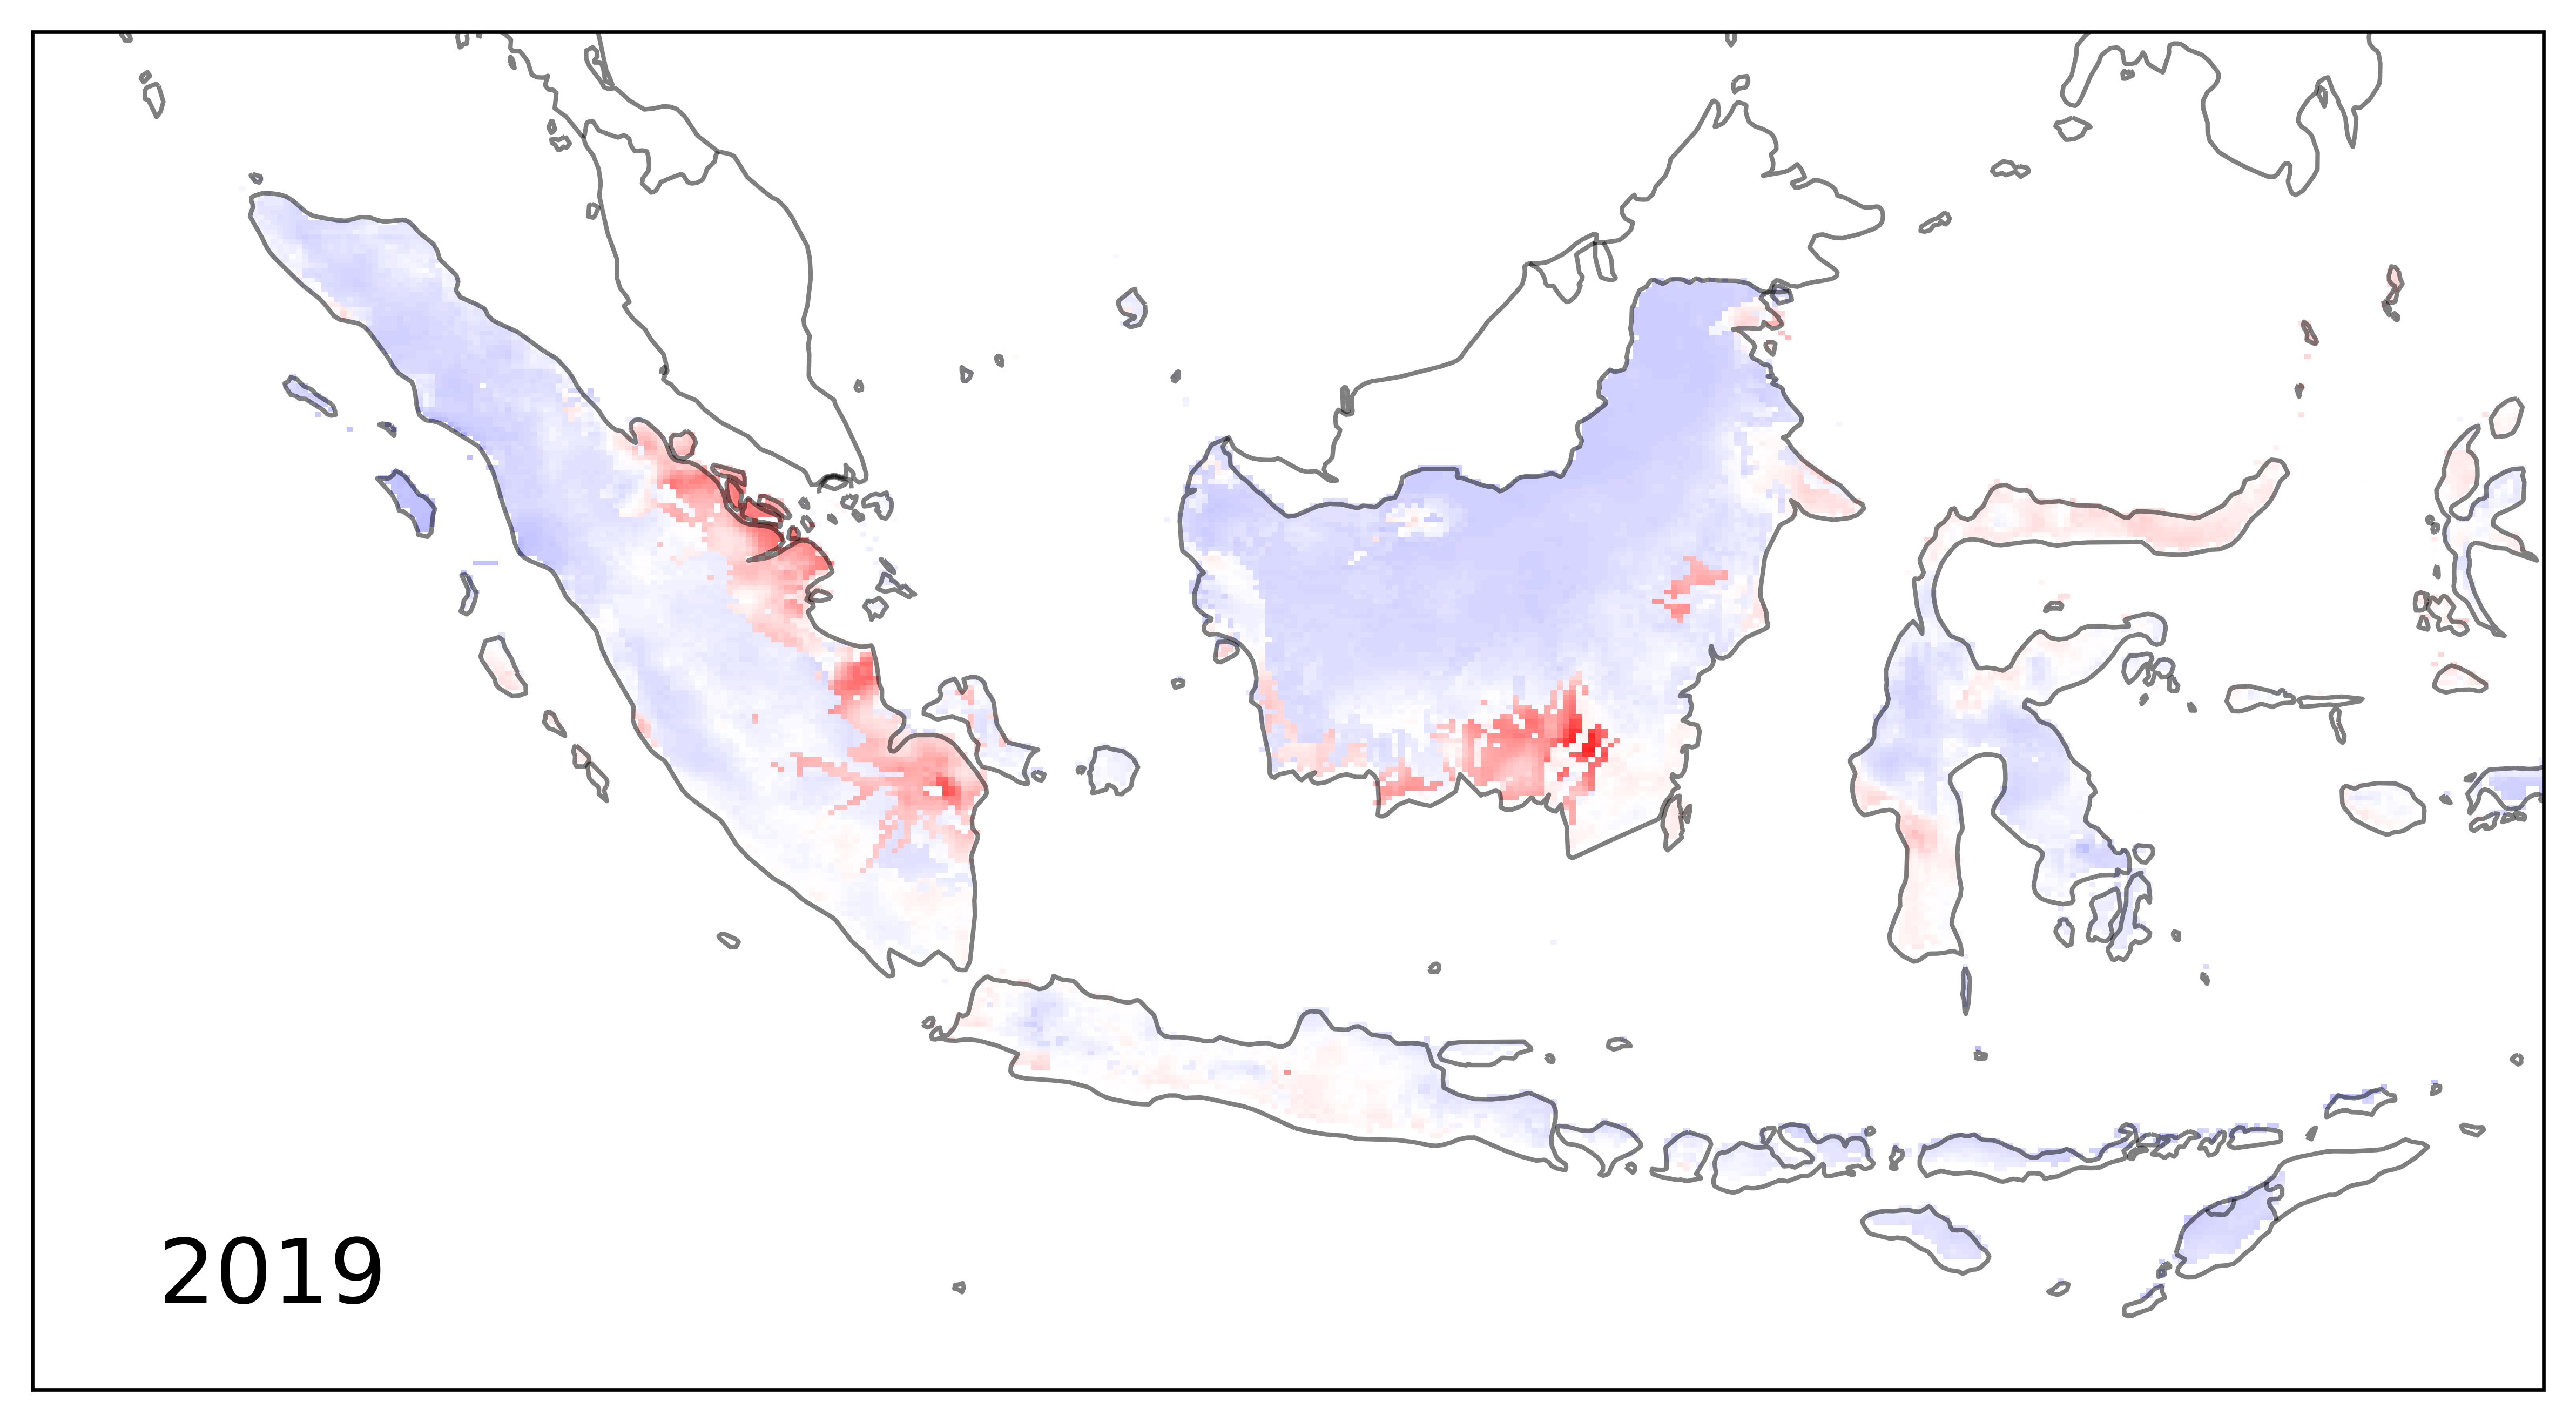

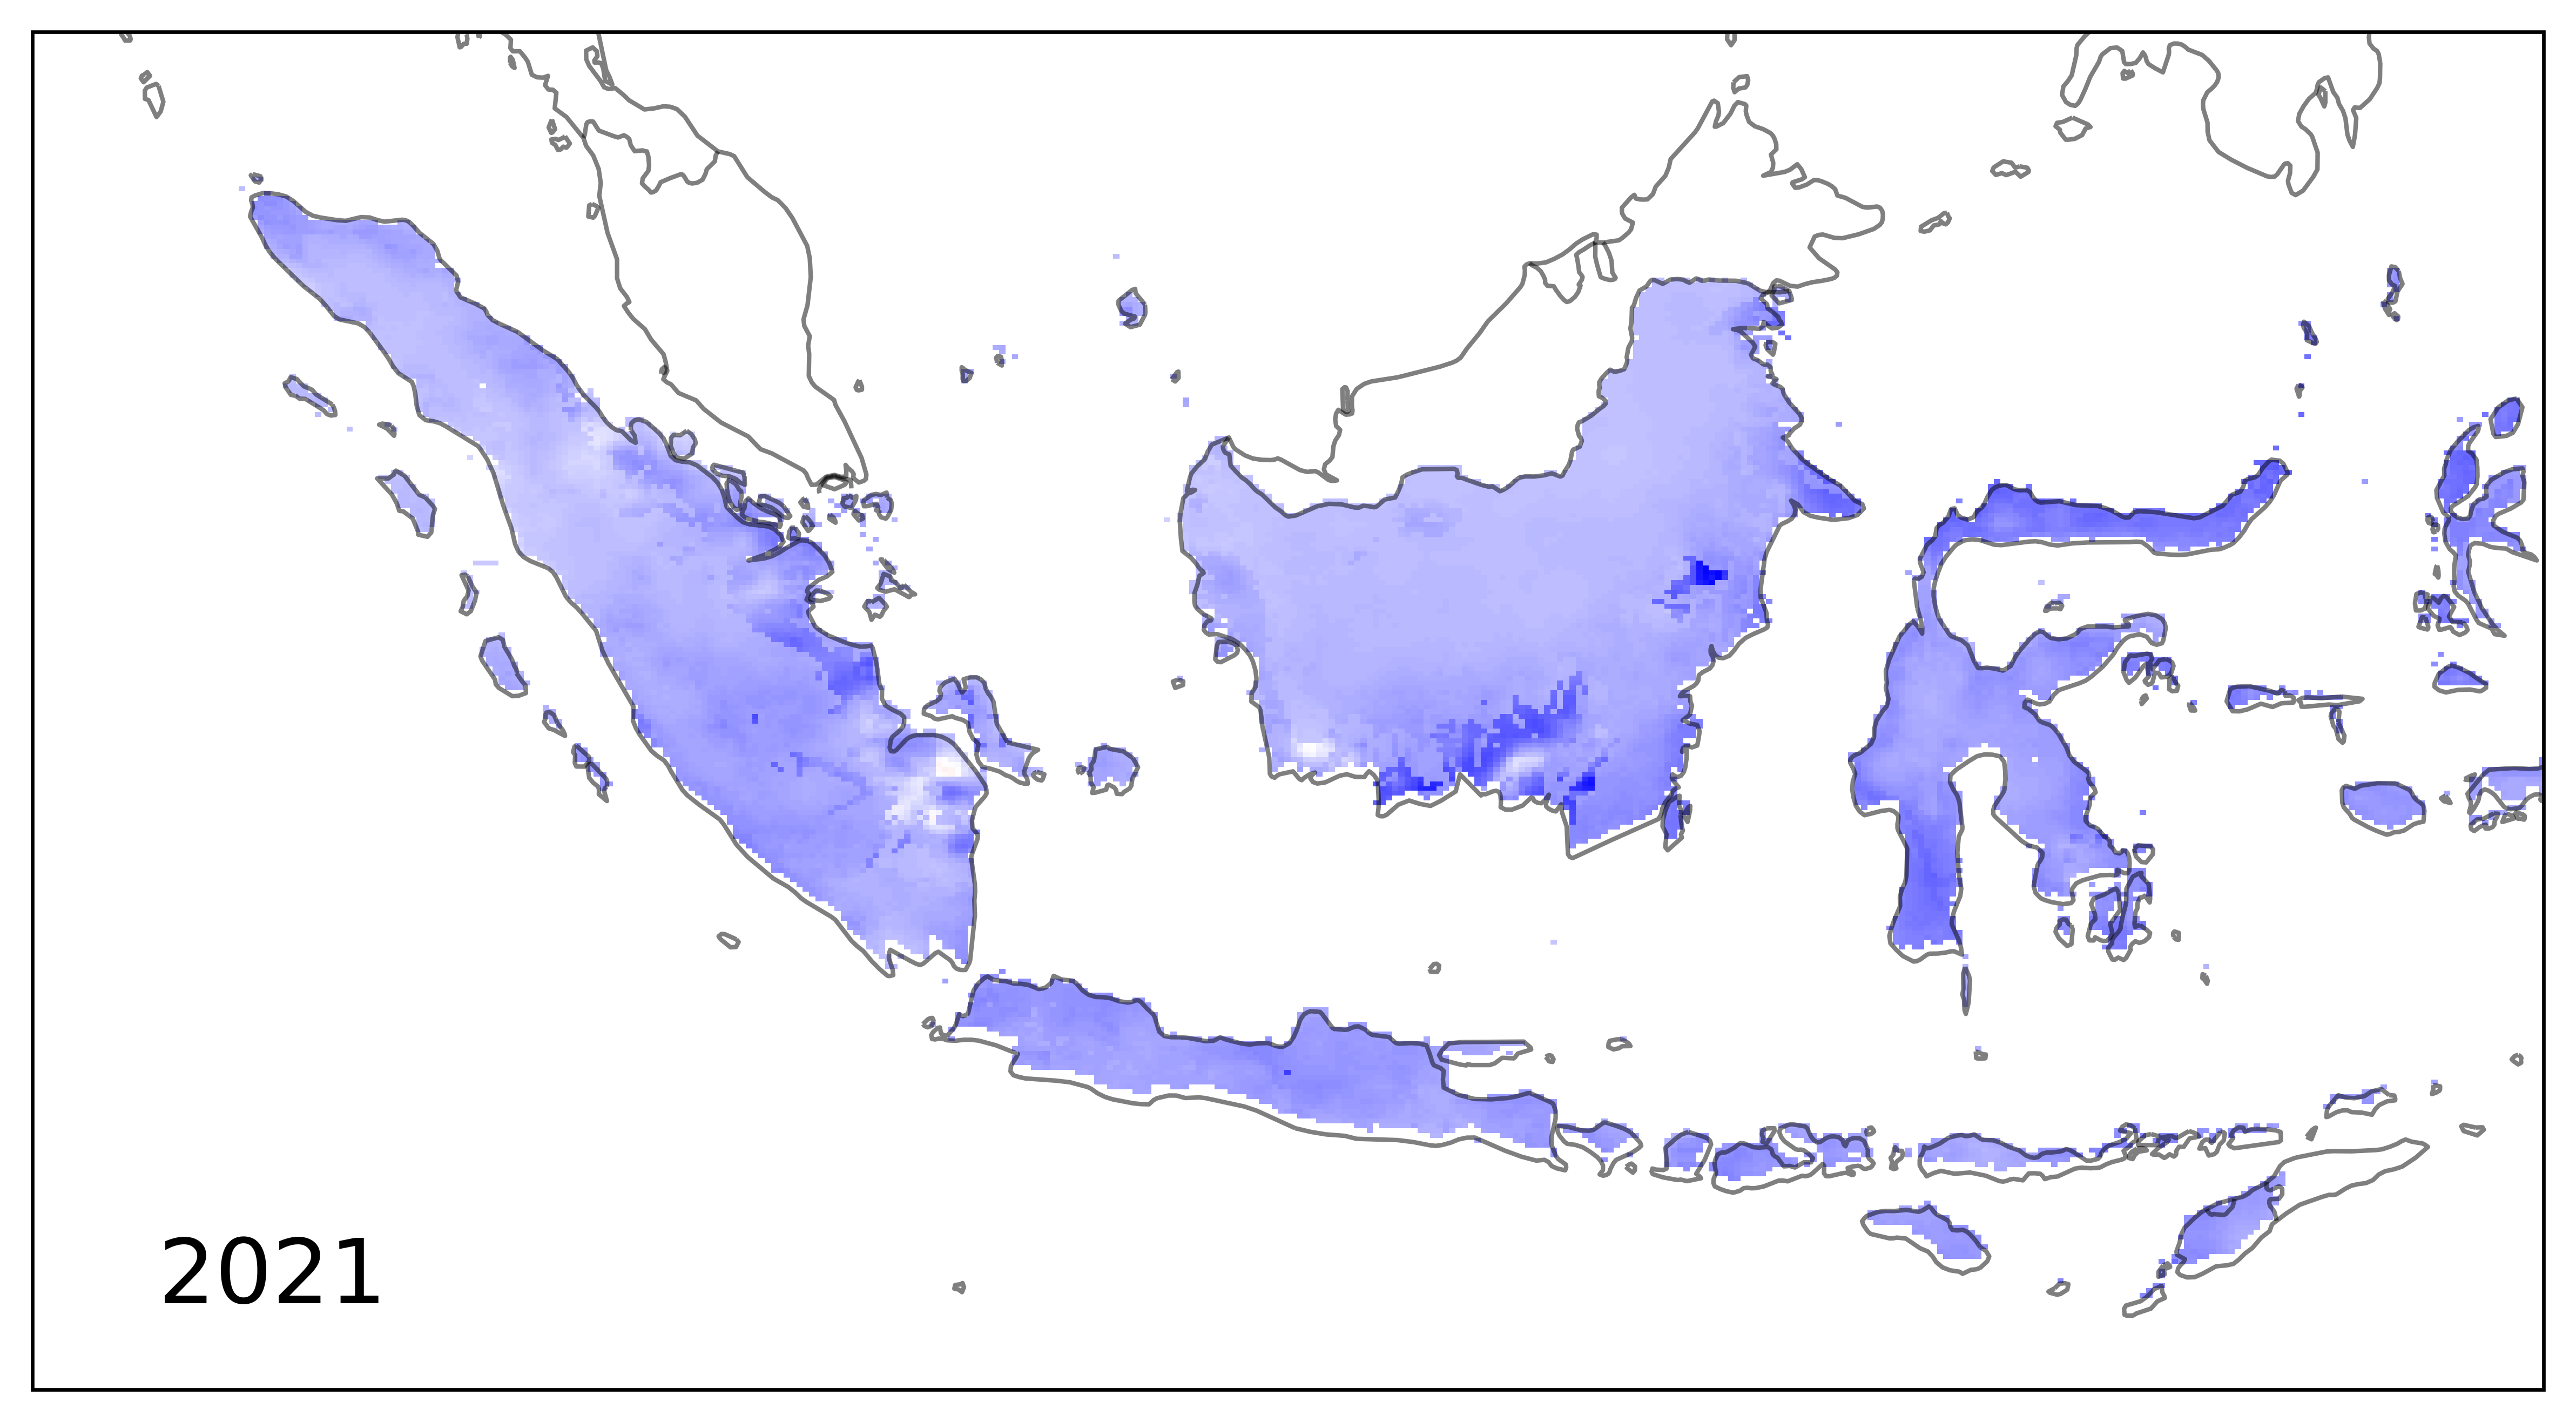

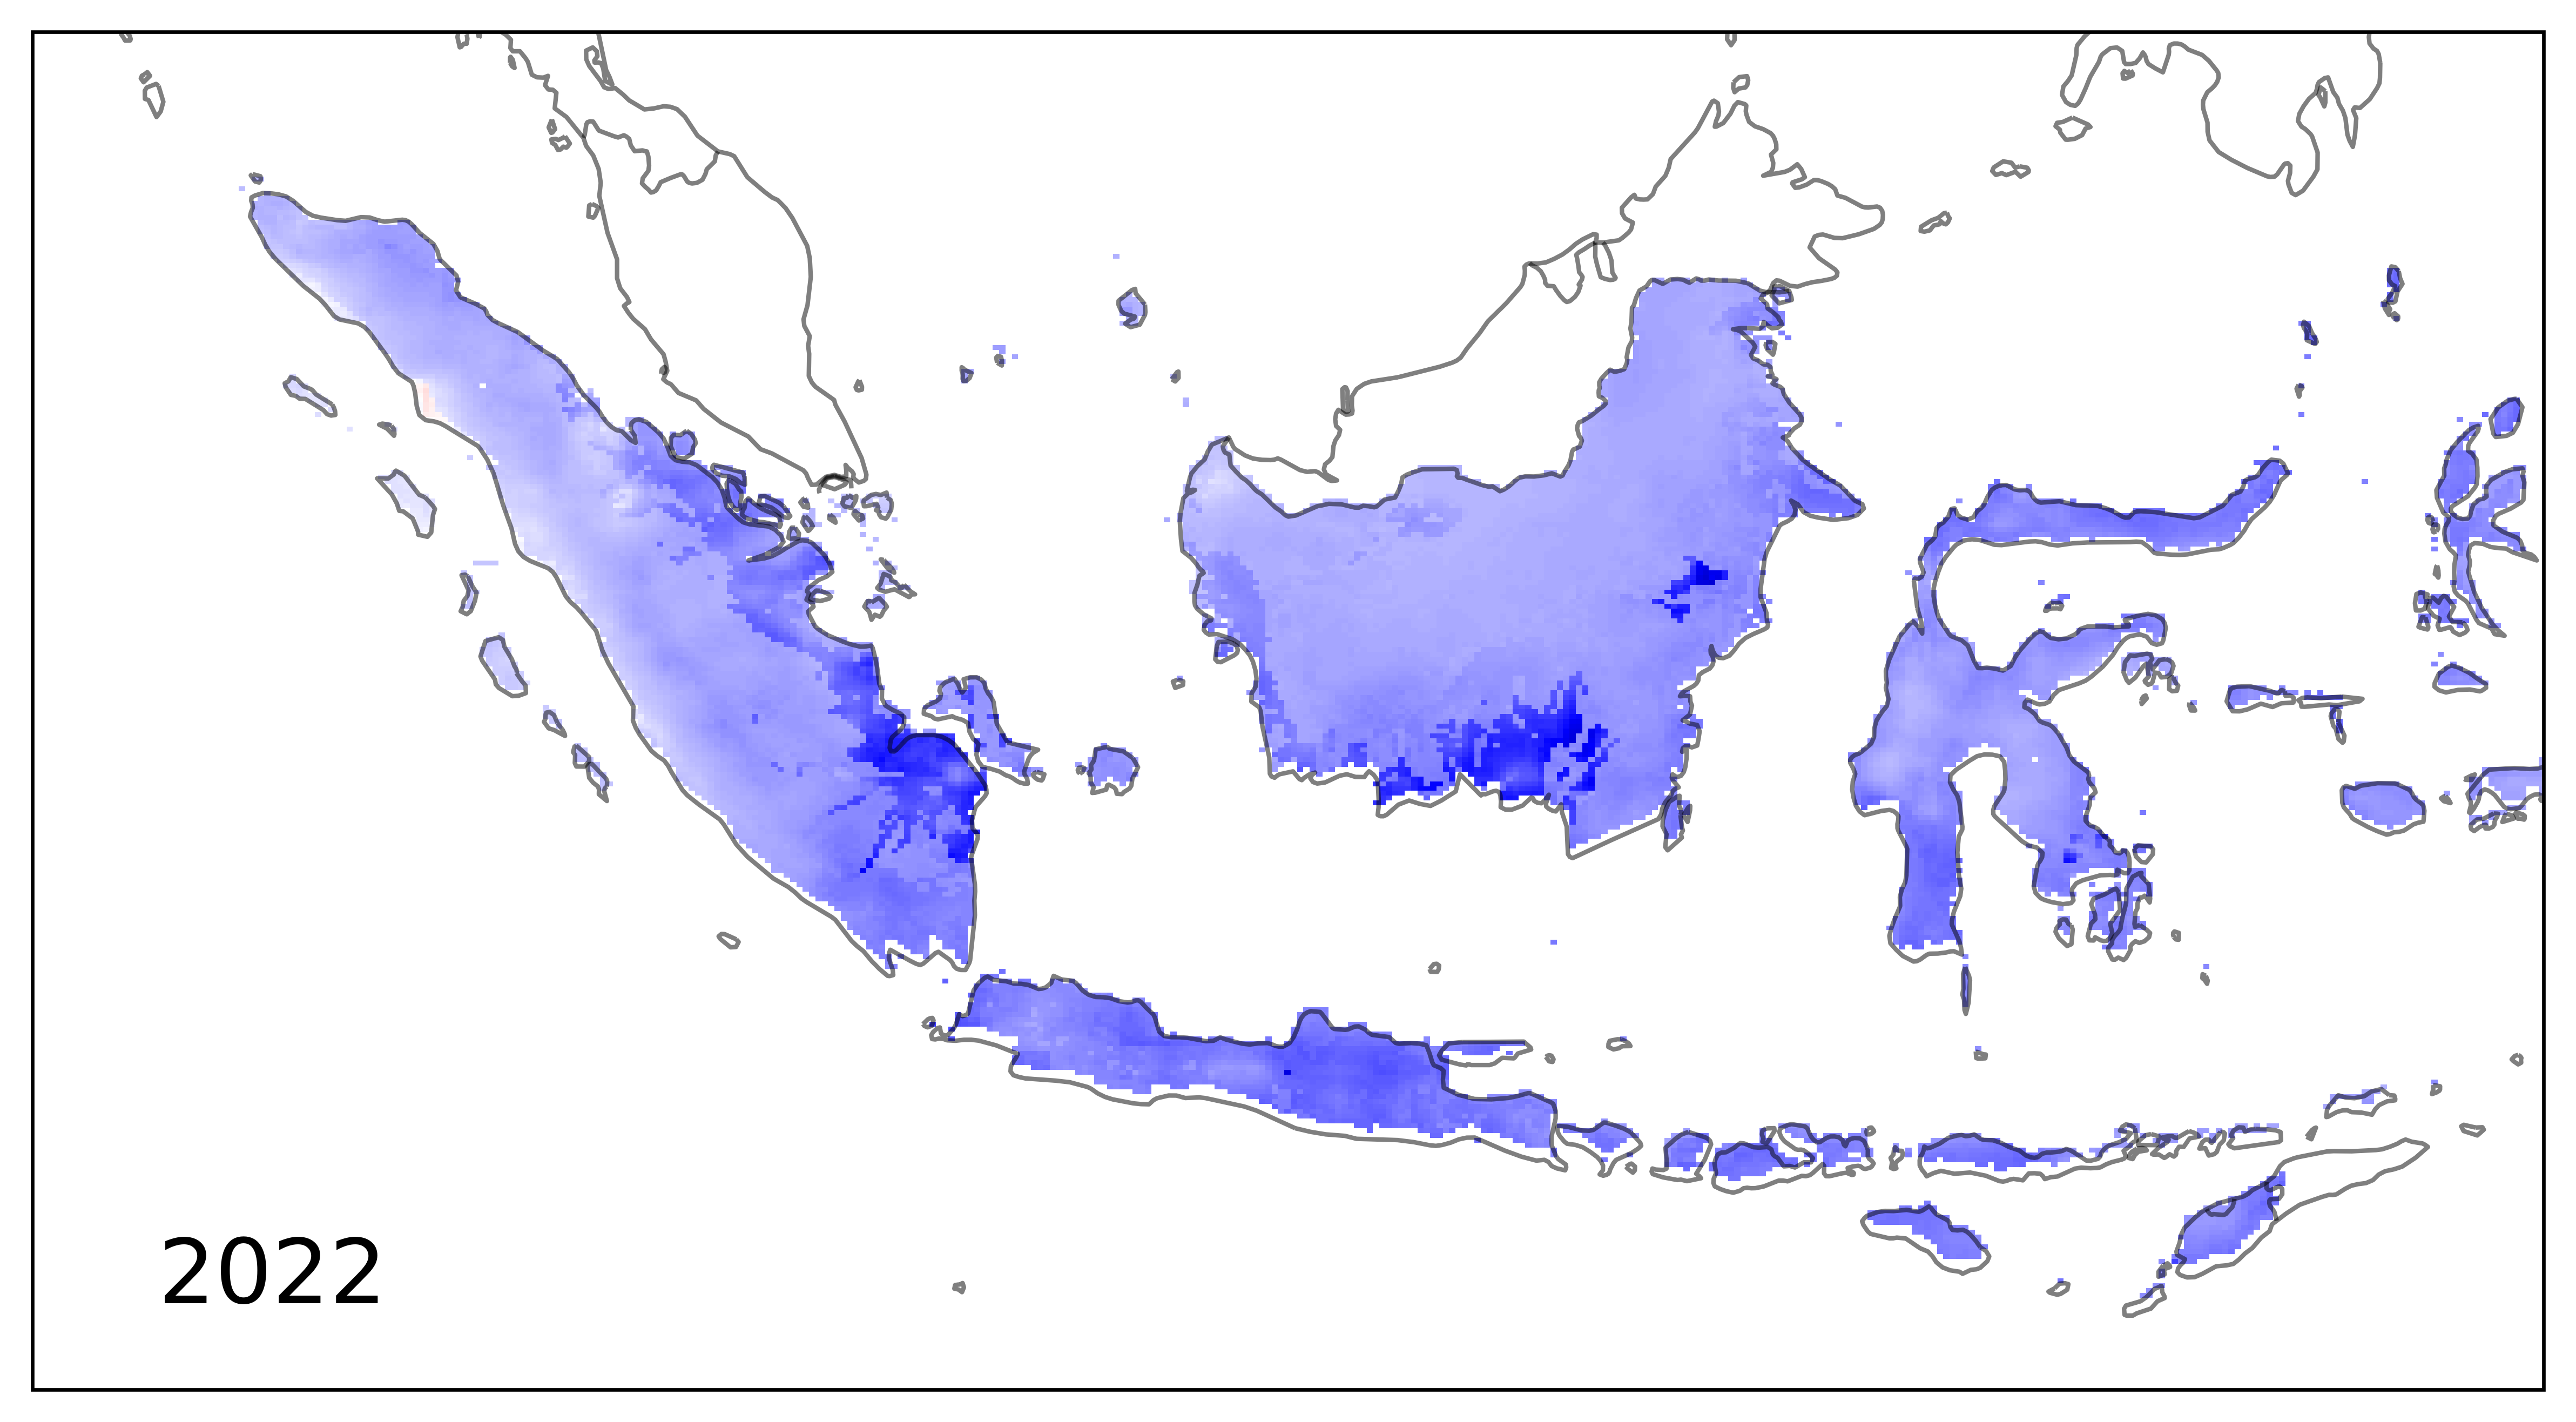

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr

# 读取SMAP数据
smap_data = xr.open_dataset('SMAP_monthly_mean_soil_moisture_indonesia.nc')

# 提取土壤湿度数据
soil_moisture_data = smap_data['soil_moisture_monthly_mean_indonesia']

# 定义年份和对应的基准值
years = [2015, 2016, 2019, 2021, 2022, 2023]
# 计算一个多年的平均基准值，而不是手动设置
baseline_value = smap_data.sel(time=slice('2000-01-01', '2023-12-31')).mean(dim='time')['soil_moisture_monthly_mean_indonesia']

# 计算每年的土壤湿度异常
for year in years:
    smap_yearly = smap_data.sel(time=slice(f'{year}-01-01', f'{year}-12-31')).mean(dim='time')
    anomaly = smap_yearly['soil_moisture_monthly_mean_indonesia'] - baseline_value
    anomaly_min = min(anomaly_min, anomaly.min().values)
    anomaly_max = max(anomaly_max, anomaly.max().values)
    anomalies[year] = anomaly

# 设置颜色映射范围，以提高对比度
vmin = anomaly_min * 1.2  # 调整最小值
vmax = anomaly_max * 0.8  # 调整最大值

# 创建一个从蓝色到红色的颜色列表   
cmap = 'seismic_r'

# 为每一年生成单独的异常值图像
for year in years:
    fig, ax = plt.subplots(figsize=(10, 7), dpi=600, subplot_kw={'projection': ccrs.PlateCarree()})

    # 获取该年的异常值数据
    anomaly = anomalies[year]

    # 绘制土壤湿度异常
    smap_plot = anomaly.plot(
        ax=ax,
        transform=ccrs.PlateCarree(),
        cmap=cmap,  # 使用红-白-蓝颜色映射
        vmin=vmin,  # 调整后的最小值
        vmax=vmax,  # 调整后的最大值
        add_colorbar=False
    )

    ax.set_extent([92, 129, -12, 8], crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.OCEAN, facecolor='white')
    ax.add_feature(cfeature.BORDERS, linestyle='-', alpha=0.5)
    ax.add_feature(cfeature.COASTLINE, alpha=0.5)
    ax.add_feature(cfeature.LAND, facecolor='white')

    # 在子图左下角添加标题
    ax.text(
        0.05,
        0.05,
        f'{year}',
        transform=ax.transAxes,
        fontsize=20,
        ha='left',
        va='bottom',
        color='black',
        bbox=dict(facecolor='white', alpha=0.7, edgecolor='none')
    )

    # 将颜色条添加到图片下方
    #cbar_ax = fig.add_axes([0.25, 0.07, 0.5, 0.03])
    #cbar = fig.colorbar(smap_plot, cax=cbar_ax, orientation='horizontal')
    #cbar.set_label('Soil Moisture Anomaly', fontsize=10)
    #cbar.ax.tick_params(labelsize=10)

    # 保存图像
    plt.savefig(f'F4 {year}.png', dpi=600, bbox_inches='tight')
    plt.show()

